# Logistic Regression

redo model training with new data in this script

In [1]:
import pandas as pd
import rdata
from sklearn.linear_model import LogisticRegression
import json
from sklearn.model_selection import GroupShuffleSplit
import numpy as np
from functions import get_cv_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_pickle("../data/df_uni_bi_tri.pickle")
df =df.reset_index(col_level=1).rename(columns = {'': 'id'}, level =0)

Add language that is going to be the label/ target for model:

In [110]:
# read df with language:
path_ind_diff = r"../data/version 1.1/primary data/individual differences data/joint.ind.diff.l2.rda"
parsed_readrate = rdata.parser.parse_file(path_ind_diff)
converted_readrate = rdata.conversion.convert(parsed_readrate)
df_readrate = converted_readrate['joint_id'][['uniform_id', 'lang']]

# need multiindex to merge properly:
df_readrate.columns = pd.MultiIndex.from_product([['labels'], df_readrate.columns]) 

# join language
df_main = df.merge(df_readrate, left_on = [('id', 'uniform_id')], right_on= [('labels', 'uniform_id')])
df_main = df_main.drop([('labels', 'uniform_id')], axis=1)

# encode language as lables ( using old lookup json):
with open("../data/outputs/language_lookup.json") as json_file:
    language_lookup = json.load(json_file)

df_main[('labels', 'lang_code')] = df_main[('labels', 'lang')].replace(language_lookup).values

In [111]:
df_main[('labels', 'lang')].unique()

array(['ee', 'fi', 'ge', 'he', 'it', 'en', 'sp'], dtype=object)

In [124]:
import itertools
from tqdm import tqdm

In [128]:
##### only for 4 lang check: #####

#df_main = df_main[df_main[('labels', 'lang')].isin(['ee', 'fi', 'it', 'sp'])]

dict_performances = {}
dict_performances_groups = []

for i in tqdm(range(2, 8)): # 8
    comb = list(itertools.combinations(['ee', 'fi', 'ge', 'he', 'it', 'en', 'sp'], i))
    print(comb)
    temp = []
    for c in comb:
        #print(c)
        df_main_ = df_main[df_main[('labels', 'lang')].isin(c)]
        logreg = LogisticRegression(C=1e5, multi_class='multinomial', solver='lbfgs', random_state=0)
        columns = ['TF_uni', 'FP_uni', 'FF_uni', 'TF_bi', 'FP_bi', 'FF_bi', 'TF_tri', 'FP_tri', 'FF_tri' ]
        cross_val_scores = get_cv_score(df_main_, columns, logreg)
        dict_performances[str(c)] = np.mean(cross_val_scores)
        temp.append(np.mean(cross_val_scores))
    dict_performances_groups.append([i, np.mean(temp)])
##########

  0%|          | 0/6 [00:00<?, ?it/s]

[('ee', 'fi'), ('ee', 'ge'), ('ee', 'he'), ('ee', 'it'), ('ee', 'en'), ('ee', 'sp'), ('fi', 'ge'), ('fi', 'he'), ('fi', 'it'), ('fi', 'en'), ('fi', 'sp'), ('ge', 'he'), ('ge', 'it'), ('ge', 'en'), ('ge', 'sp'), ('he', 'it'), ('he', 'en'), ('he', 'sp'), ('it', 'en'), ('it', 'sp'), ('en', 'sp')]


5it [00:01,  4.04it/s]


0.6736842105263158


5it [00:00,  5.93it/s]


0.8526315789473683


5it [00:00,  5.02it/s]


0.8235294117647058


5it [00:01,  4.94it/s]


0.8


5it [00:00,  5.84it/s]


0.9888888888888889


5it [00:01,  4.27it/s]


0.711111111111111


5it [00:00,  6.26it/s]


0.8736842105263157


5it [00:00,  6.85it/s]


0.8705882352941176


5it [00:00,  5.36it/s]


0.8222222222222222


5it [00:01,  4.36it/s]


1.0


5it [00:00,  6.60it/s]


0.6555555555555556


5it [00:01,  4.26it/s]


0.8941176470588236


5it [00:00,  6.83it/s]


0.9


5it [00:00,  5.99it/s]


1.0


5it [00:00,  6.99it/s]


0.8666666666666666


5it [00:00,  5.85it/s]


0.8


5it [00:00,  6.29it/s]


0.9875


5it [00:00,  6.20it/s]


0.775


5it [00:01,  3.95it/s]


1.0


5it [00:01,  4.68it/s]


0.6823529411764706


5it [00:00,  5.86it/s]
 17%|█▋        | 1/6 [00:20<01:40, 20.07s/it]

0.9647058823529411
[('ee', 'fi', 'ge'), ('ee', 'fi', 'he'), ('ee', 'fi', 'it'), ('ee', 'fi', 'en'), ('ee', 'fi', 'sp'), ('ee', 'ge', 'he'), ('ee', 'ge', 'it'), ('ee', 'ge', 'en'), ('ee', 'ge', 'sp'), ('ee', 'he', 'it'), ('ee', 'he', 'en'), ('ee', 'he', 'sp'), ('ee', 'it', 'en'), ('ee', 'it', 'sp'), ('ee', 'en', 'sp'), ('fi', 'ge', 'he'), ('fi', 'ge', 'it'), ('fi', 'ge', 'en'), ('fi', 'ge', 'sp'), ('fi', 'he', 'it'), ('fi', 'he', 'en'), ('fi', 'he', 'sp'), ('fi', 'it', 'en'), ('fi', 'it', 'sp'), ('fi', 'en', 'sp'), ('ge', 'he', 'it'), ('ge', 'he', 'en'), ('ge', 'he', 'sp'), ('ge', 'it', 'en'), ('ge', 'it', 'sp'), ('ge', 'en', 'sp'), ('he', 'it', 'en'), ('he', 'it', 'sp'), ('he', 'en', 'sp'), ('it', 'en', 'sp')]


5it [00:00,  5.08it/s]


0.6285714285714286


5it [00:01,  4.75it/s]


0.6307692307692306


5it [00:01,  4.84it/s]


0.6814814814814815


5it [00:00,  5.45it/s]


0.7925925925925925


5it [00:01,  3.43it/s]


0.5407407407407407


5it [00:01,  4.78it/s]


0.7384615384615384


5it [00:01,  4.05it/s]


0.8074074074074075


5it [00:01,  3.90it/s]


0.8814814814814815


5it [00:01,  4.33it/s]


0.6814814814814815


5it [00:01,  3.68it/s]


0.768


5it [00:05,  1.03s/it]


0.8160000000000001


5it [00:01,  3.86it/s]


0.5840000000000001


5it [00:01,  4.26it/s]


0.8846153846153845


5it [00:01,  4.94it/s]


0.6923076923076923


5it [00:00,  5.37it/s]


0.8076923076923077


5it [00:01,  3.53it/s]


0.7923076923076923


5it [00:01,  4.19it/s]


0.748148148148148


5it [00:01,  3.63it/s]


0.9111111111111111


5it [00:00,  5.40it/s]


0.6962962962962962


5it [00:01,  4.87it/s]


0.768


5it [00:01,  4.62it/s]


0.8799999999999999


5it [00:01,  4.26it/s]


0.672


5it [00:00,  5.04it/s]


0.8615384615384617


5it [00:01,  4.44it/s]


0.6538461538461539


5it [00:01,  3.52it/s]


0.8076923076923077


5it [00:01,  4.65it/s]


0.8320000000000001


5it [00:01,  3.87it/s]


0.9119999999999999


5it [00:01,  3.79it/s]


0.744


5it [00:01,  4.15it/s]


0.9384615384615385


5it [00:01,  4.86it/s]


0.7692307692307692


5it [00:01,  4.94it/s]


0.8923076923076924


5it [00:01,  3.74it/s]


0.9333333333333333


5it [00:01,  3.65it/s]


0.7


5it [00:01,  3.89it/s]


0.8666666666666666


5it [00:00,  5.13it/s]
 33%|███▎      | 2/6 [01:05<02:20, 35.15s/it]

0.8400000000000001
[('ee', 'fi', 'ge', 'he'), ('ee', 'fi', 'ge', 'it'), ('ee', 'fi', 'ge', 'en'), ('ee', 'fi', 'ge', 'sp'), ('ee', 'fi', 'he', 'it'), ('ee', 'fi', 'he', 'en'), ('ee', 'fi', 'he', 'sp'), ('ee', 'fi', 'it', 'en'), ('ee', 'fi', 'it', 'sp'), ('ee', 'fi', 'en', 'sp'), ('ee', 'ge', 'he', 'it'), ('ee', 'ge', 'he', 'en'), ('ee', 'ge', 'he', 'sp'), ('ee', 'ge', 'it', 'en'), ('ee', 'ge', 'it', 'sp'), ('ee', 'ge', 'en', 'sp'), ('ee', 'he', 'it', 'en'), ('ee', 'he', 'it', 'sp'), ('ee', 'he', 'en', 'sp'), ('ee', 'it', 'en', 'sp'), ('fi', 'ge', 'he', 'it'), ('fi', 'ge', 'he', 'en'), ('fi', 'ge', 'he', 'sp'), ('fi', 'ge', 'it', 'en'), ('fi', 'ge', 'it', 'sp'), ('fi', 'ge', 'en', 'sp'), ('fi', 'he', 'it', 'en'), ('fi', 'he', 'it', 'sp'), ('fi', 'he', 'en', 'sp'), ('fi', 'it', 'en', 'sp'), ('ge', 'he', 'it', 'en'), ('ge', 'he', 'it', 'sp'), ('ge', 'he', 'en', 'sp'), ('ge', 'it', 'en', 'sp'), ('he', 'it', 'en', 'sp')]


5it [00:01,  3.26it/s]


0.5942857142857143


5it [00:02,  2.00it/s]


0.6055555555555555


5it [00:01,  2.79it/s]


0.7333333333333334


5it [00:01,  3.51it/s]


0.47777777777777775


5it [00:01,  3.51it/s]


0.511764705882353


5it [00:01,  3.30it/s]


0.6823529411764706


5it [00:01,  4.17it/s]


0.5


5it [00:01,  3.17it/s]


0.6628571428571428


5it [00:01,  3.06it/s]


0.4914285714285714


5it [00:01,  3.08it/s]


0.6333333333333333


5it [00:01,  2.81it/s]


0.7117647058823529


5it [00:01,  3.00it/s]


0.8


5it [00:01,  2.98it/s]


0.6823529411764706


5it [00:02,  2.33it/s]


0.7771428571428572


5it [00:01,  2.86it/s]


0.6342857142857143


5it [00:01,  2.73it/s]


0.7388888888888888


5it [00:01,  2.74it/s]


0.793939393939394


5it [00:02,  2.45it/s]


0.5515151515151515


5it [00:01,  3.59it/s]


0.7058823529411764


5it [00:02,  1.96it/s]


0.6705882352941177


5it [00:02,  1.82it/s]


0.7705882352941176


5it [00:02,  2.05it/s]


0.8411764705882352


5it [00:02,  1.91it/s]


0.676470588235294


5it [00:01,  3.01it/s]


0.8171428571428573


5it [00:01,  3.44it/s]


0.7085714285714287


5it [00:01,  4.06it/s]


0.7833333333333333


5it [00:01,  2.75it/s]


0.8


5it [00:01,  3.31it/s]


0.6181818181818182


5it [00:01,  3.39it/s]


0.7294117647058824


5it [00:02,  2.43it/s]


0.6647058823529413


5it [00:02,  1.84it/s]


0.8727272727272727


5it [00:02,  2.31it/s]


0.7272727272727273


5it [00:01,  2.65it/s]


0.8411764705882353


5it [00:02,  2.44it/s]


0.7764705882352942


5it [00:01,  2.99it/s]
 50%|█████     | 3/6 [02:11<02:26, 48.94s/it]

0.75
[('ee', 'fi', 'ge', 'he', 'it'), ('ee', 'fi', 'ge', 'he', 'en'), ('ee', 'fi', 'ge', 'he', 'sp'), ('ee', 'fi', 'ge', 'it', 'en'), ('ee', 'fi', 'ge', 'it', 'sp'), ('ee', 'fi', 'ge', 'en', 'sp'), ('ee', 'fi', 'he', 'it', 'en'), ('ee', 'fi', 'he', 'it', 'sp'), ('ee', 'fi', 'he', 'en', 'sp'), ('ee', 'fi', 'it', 'en', 'sp'), ('ee', 'ge', 'he', 'it', 'en'), ('ee', 'ge', 'he', 'it', 'sp'), ('ee', 'ge', 'he', 'en', 'sp'), ('ee', 'ge', 'it', 'en', 'sp'), ('ee', 'he', 'it', 'en', 'sp'), ('fi', 'ge', 'he', 'it', 'en'), ('fi', 'ge', 'he', 'it', 'sp'), ('fi', 'ge', 'he', 'en', 'sp'), ('fi', 'ge', 'it', 'en', 'sp'), ('fi', 'he', 'it', 'en', 'sp'), ('ge', 'he', 'it', 'en', 'sp')]


5it [00:01,  2.96it/s]


0.572093023255814


5it [00:02,  2.00it/s]


0.6772727272727272


5it [00:01,  2.71it/s]


0.49090909090909085


5it [00:02,  2.35it/s]


0.6818181818181819


5it [00:01,  2.67it/s]


0.5590909090909091


5it [00:02,  1.76it/s]


0.6577777777777778


5it [00:02,  2.41it/s]


0.6047619047619048


5it [00:02,  2.39it/s]


0.42380952380952375


5it [00:02,  1.94it/s]


0.5395348837209302


5it [00:08,  1.68s/it]


0.5545454545454546


5it [00:04,  1.06it/s]


0.7380952380952381


5it [00:02,  2.00it/s]


0.5523809523809524


5it [00:02,  2.33it/s]


0.6930232558139535


5it [00:02,  1.71it/s]


0.7000000000000001


5it [00:01,  2.61it/s]


0.6142857142857143


5it [00:01,  2.72it/s]


0.7952380952380953


5it [00:01,  2.87it/s]


0.6047619047619047


5it [00:02,  2.40it/s]


0.7302325581395348


5it [00:02,  2.49it/s]


0.7136363636363636


5it [00:02,  1.80it/s]


0.6285714285714286


5it [00:01,  2.96it/s]
 67%|██████▋   | 4/6 [03:06<01:42, 51.32s/it]

0.719047619047619
[('ee', 'fi', 'ge', 'he', 'it', 'en'), ('ee', 'fi', 'ge', 'he', 'it', 'sp'), ('ee', 'fi', 'ge', 'he', 'en', 'sp'), ('ee', 'fi', 'ge', 'it', 'en', 'sp'), ('ee', 'fi', 'he', 'it', 'en', 'sp'), ('ee', 'ge', 'he', 'it', 'en', 'sp'), ('fi', 'ge', 'he', 'it', 'en', 'sp')]


5it [00:02,  2.43it/s]


0.6615384615384616


5it [00:02,  2.07it/s]


0.5038461538461538


5it [00:02,  1.70it/s]


0.5576923076923077


5it [00:02,  2.33it/s]


0.6226415094339622


5it [00:02,  2.01it/s]


0.5529411764705883


5it [00:02,  1.93it/s]


0.6784313725490196


5it [00:01,  2.51it/s]
 83%|████████▎ | 5/6 [03:22<00:38, 38.88s/it]

0.6352941176470587
[('ee', 'fi', 'ge', 'he', 'it', 'en', 'sp')]


5it [00:02,  2.03it/s]
100%|██████████| 6/6 [03:25<00:00, 34.23s/it]

0.5800000000000001


In [129]:
dict_performances

{"('ee', 'fi')": 0.6736842105263158,
 "('ee', 'ge')": 0.8526315789473683,
 "('ee', 'he')": 0.8235294117647058,
 "('ee', 'it')": 0.8,
 "('ee', 'en')": 0.9888888888888889,
 "('ee', 'sp')": 0.711111111111111,
 "('fi', 'ge')": 0.8736842105263157,
 "('fi', 'he')": 0.8705882352941176,
 "('fi', 'it')": 0.8222222222222222,
 "('fi', 'en')": 1.0,
 "('fi', 'sp')": 0.6555555555555556,
 "('ge', 'he')": 0.8941176470588236,
 "('ge', 'it')": 0.9,
 "('ge', 'en')": 1.0,
 "('ge', 'sp')": 0.8666666666666666,
 "('he', 'it')": 0.8,
 "('he', 'en')": 0.9875,
 "('he', 'sp')": 0.775,
 "('it', 'en')": 1.0,
 "('it', 'sp')": 0.6823529411764706,
 "('en', 'sp')": 0.9647058823529411,
 "('ee', 'fi', 'ge')": 0.6285714285714286,
 "('ee', 'fi', 'he')": 0.6307692307692306,
 "('ee', 'fi', 'it')": 0.6814814814814815,
 "('ee', 'fi', 'en')": 0.7925925925925925,
 "('ee', 'fi', 'sp')": 0.5407407407407407,
 "('ee', 'ge', 'he')": 0.7384615384615384,
 "('ee', 'ge', 'it')": 0.8074074074074075,
 "('ee', 'ge', 'en')": 0.8814814814814

In [137]:
dict_performances_groups

[[2, 0.8543923124805478],
 [3, 0.7758440839583697],
 [4, 0.6953222501121661],
 [5, 0.6309946003301484],
 [6, 0.6017692998825074],
 [7, 0.5800000000000001]]

In [146]:
np.array(dict_performances_groups)[:, 0]

array([2., 3., 4., 5., 6., 7.])

In [147]:
import matplotlib.pyplot as plt

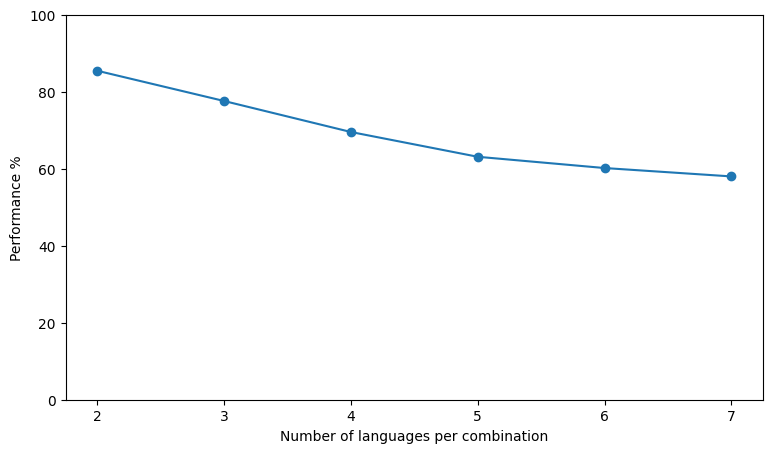

In [166]:

fig, axes = plt.subplots(ncols=1, figsize=(9,5))
axes.plot(np.array(dict_performances_groups)[:, 0],
        [i * 100 for i in  np.array(dict_performances_groups)[:, 1]], marker='o')
# mean performance per group of all combinations of languages
#axes.set_title('Mean performance per group of all possible combinations of languages. E.g. 2 on the x axis means a group all language pairs amd y shows the mean performance. ')
axes.set_xlabel('Number of languages per combination')
axes.set_ylabel('Performance %')
axes.set_ylim(0, 100);

## LogReg NLIR

In [95]:
# defining model with correct solver
logreg = LogisticRegression(C=1e5, multi_class='multinomial', solver='lbfgs', random_state=0)

In [96]:
# columns used in training
columns = ['TF_uni', 'FP_uni', 'FF_uni', 'TF_bi', 'FP_bi', 'FF_bi', 'TF_tri', 'FP_tri', 'FF_tri' ]

Cross validation score: 

(only needed for report and not for further coding)

In [97]:
cross_val_scores = get_cv_score(df_main, columns, logreg)
print(np.mean(cross_val_scores))
#cross_val_scores # [0.65, 0.5666666666666667, 0.6, 0.5166666666666667, 0.5666666666666667]

5it [00:01,  3.40it/s]

0.6538461538461539
0.6538461538461539


In [98]:
# real train-test split to be used for further analysis: 
train_subset = df_main[columns]
train_label_subset = df_main[('labels', 'lang_code')]

gss = GroupShuffleSplit(n_splits=5, test_size = 0.3, random_state=42)
split_indexes = list(gss.split(train_subset, train_label_subset, df_main[('id','uniform_id')]))[0]
train_idx = list(split_indexes[0])
test_idx = list(split_indexes[1])

X_train = train_subset.iloc[train_idx]
y_train = train_label_subset.iloc[train_idx]
X_test = train_subset.iloc[test_idx]
y_test = train_label_subset.iloc[test_idx]

test_lang = df_main[('labels', 'lang')].iloc[test_idx]
test_lang_codes = df_main[('labels', 'lang_code')].iloc[test_idx]

In [99]:
# fit model:
logreg.fit(X_train, y_train)

# only for score count:
y_pred = logreg.predict(X_test)
test_acc_score = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {test_acc_score}; overall cross validation accuracy {np.mean(cross_val_scores)}')
# Test set accuracy: 0.6888888888888889; overall cross validation accuracy 0.5800000000000001 for all languages
# Test set accuracy: 0.4074074074074074; overall cross validation accuracy 0.4914285714285714 for 4 languages


Test set accuracy: 0.5; overall cross validation accuracy 0.6538461538461539


Test set accuracy: 0.7857142857142857; overall cross validation accuracy 0.6736842105263158 for ee - fi (46)

Test set accuracy: 0.8571428571428571; overall cross validation accuracy 0.711111111111111 for ee - sp (44)

Test set accuracy: 0.7692307692307693; overall cross validation accuracy 0.8 for ee -it  (43)

Test set accuracy: 0.5384615384615384; overall cross validation accuracy 0.8222222222222222 fi it (43)

Test set accuracy: 0.5714285714285714; overall cross validation accuracy 0.6555555555555556 fi sp (44)

Test set accuracy: 0.7692307692307693; overall cross validation accuracy 0.6823529411764706 it sp (41)



Test set accuracy: 0.5238095238095238; overall cross validation accuracy 0.5407407407407407 ee fi sp 

Test set accuracy: 0.55; overall cross validation accuracy 0.6814814814814815 ee fi it

Test set accuracy: 0.55; overall cross validation accuracy 0.6923076923076923 ee sp it

Test set accuracy: 0.5; overall cross validation accuracy 0.6538461538461539 fi sp it



















### LogReg Similarity

Create dictionary with df for each language separately to be used for similarity metrics:

In [13]:
X_test['lang'] = test_lang # add language column
languages = list(test_lang.unique())
dict_lang = {}
for ll in languages:
    df = X_test[X_test['lang'] == ll]
    dict_lang[ll] = df


dict_proba ={}
len_dfs = []
lang_identifier = []
for key in dict_lang.keys():
    lang_df = dict_lang[key][columns]
    test_proba = logreg.predict_proba(lang_df) # predicting probabilities here
    len_df = len(lang_df)
    test_proba = test_proba.sum(axis=0)   # sum bc they are normalised by number of participants
    dict_proba[key] = test_proba
    len_dfs.append(len_df) # record length of language df
    lang_identifier.append(key)

/tmp/ipykernel_2200/2390796384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['lang'] = test_lang # add language column


In [14]:
# to pandas:
df_predictions = pd.DataFrame(dict_proba).reset_index()
# cols are lang on which predicted and rows are outputs

# add col with lenghts and lang name
df_predictions['length'] = len_dfs
df_predictions['lang'] = lang_identifier

In [15]:
df_predictions

,index,ee,fi,it,sp,length,lang
0,0,1.008800,1.000000,5.155617e-17,1.000196,9,ee
1,1,2.820599,1.979845,5.632468e-08,1.888169,5,fi
2,2,0.000030,0.998007,3.453242e+00,1.368055,4,it
3,3,5.170571,1.022147,5.467576e-01,4.743580,9,sp


Convert into pair dictionary:

In [16]:
lang_values = []
lang_pairs = []
#lang_similarities = {}
for key1 in df_predictions['lang'].unique(): 
    for key2 in df_predictions['lang'].unique(): 
        val1 = float(df_predictions[df_predictions['lang'] == key1][key2])
        val2 = float(df_predictions[df_predictions['lang'] == key2][key1])
        len1 = float(df_predictions[df_predictions['lang'] == key1]['length'])
        len2 = float(df_predictions[df_predictions['lang'] == key2]['length'])
        
        #lang_similarities[f'{key1}_{key2}'] = ((val1 + val2) /(len1+len2)) #  divide by corpus length bc summed above
        lang_values.append((val1 + val2) / (len1+len2))
        lang_pairs.append(f'{key1}_{key2}')

In [17]:
df_lang_similarities = pd.DataFrame({'pair': lang_pairs, 'logreg_val': lang_values})

In [18]:
# inverted 
df_lang_similarities['logreg_val_inverted'] = 1 - df_lang_similarities['logreg_val']

In [19]:
#lang_similarities # invert as 1- proba. 
df_lang_similarities

,pair,logreg_val,logreg_val_inverted
0,ee_ee,0.112089,0.887911
1,ee_fi,0.272900,0.727100
2,ee_it,0.000002,0.999998
3,ee_sp,0.342820,0.657180
4,fi_ee,0.272900,0.727100
5,fi_fi,0.395969,0.604031
6,fi_it,0.110890,0.889110
7,fi_sp,0.207880,0.792120
8,it_ee,0.000002,0.999998
9,it_fi,0.110890,0.889110


In [20]:
# write 

df_lang_similarities.to_csv("../data/outputs/logreg_similarity_4lang.csv", index = False) # rename for other saves

**ToDos:**

- investigate why 4 lang perform worse than all. maybe try with 2? ( very different and very similar - eg ee vs fi and ee and sp)
- do separate runs with only bi and bi+tri-grams and fill table in report
- plot language tree using both similarity metrics
- do majority class baseline (cv accuracy only)

